#### Quando os histogramas não funcionam

Como já vimos, os histogramas são uma ótima forma de explorar a distribuição de uma única variável. Contudo, quando queremos comparar a distribuição de mais de uma variável, os histogramas ficam confusos e mais difíceis de entender. Por exemplo, se quiséssemos comparar a distribuição dos atrasos entre companhias aéreas em Nova York, uma abordagem que não funciona bem é a criação de histogramas para cada companhia aérea num mesmo gráfico:

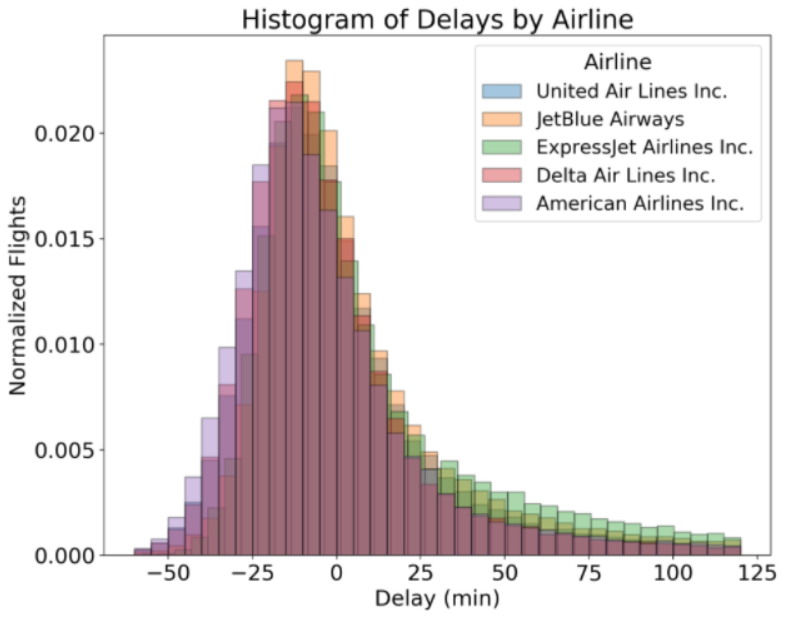

Veja que o eixo y foi normalizado para levar em consideração a diferença de número de voos entre as companhias aéreas. A sobreposição das barras torna esse gráfico quase impossível de fazer comparações entre as companhias. Uma solução é fazer uma curva de densidade.

Uma curva de densidade (density plot) é uma versão contínua e suavizada do histograma estimada a partir dos dados. A forma mais comum de estimativa é através da estimativa de densidade kernel (em inglês, KDE). Neste método, uma curva contínua (o kernel) é desenhada para cada ponto individualmente e todas essas curvas são somadas juntas para apresentar uma única estimativa de densidade suavisada. O kernel é geralmente gaussiano (que produz uma curva em formato de sino) para cada dado. Como essa explicação é um pouco confusa, veja o gráfico abaixo:

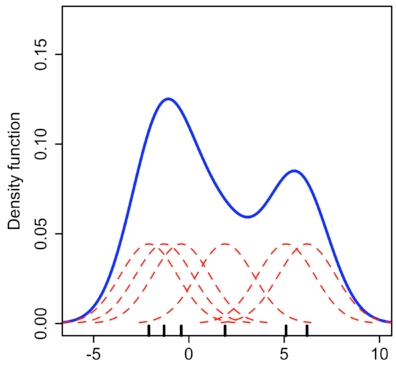

Cada linha vertical no eixo x representa um dado. Os kernels individuais (gaussianos, nesse exemplo) são desenhados em linhas vermelhas tracejadas em cima de cada dado. A linha sólida azul é a curva criada para sumarizar cada Gaussiana individual e forma a curva de densidade.

O eixo x é o valor de cada variável como no histograma, mas veja que o eixo y é diferente. O eixo y num gráfico de densidade é a probabilidade da função de densidade. A densidade é diferente de probabilidade. A densidade é a probabilidade por unidade do eixo x. Para converter para probabilidade, nós precisamos encontrar a área em baixo da curva de um intervalo específico do eixo x. Nesse caso, a densidade pode assumir valores maiores do que 1, contudo a área total da curva precisa integrar para 1. Para simplificar, pensamos no eixo y como um valor para comparações relativas entre diferentes categorias.

Vamos voltar aos nossos dados do titanic.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Vamos comparar as densidades de idades entre duas classes: homens e mulheres. Para isso simplesmente adicionaremos o argumento density=True.

Text(0, 0.5, 'Quantidade de passageiros')

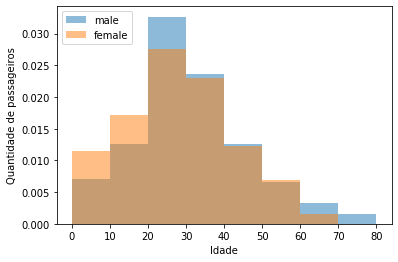

In [25]:
male = data.loc[data['Sex'] == 'male']
female = data.loc[data['Sex'] == 'female']

bins = np.linspace(0, 80, 9)
male.Age.values
plt.hist(male.Age.values, bins, alpha = 0.5, label='male', density=True)
plt.hist(female.Age.values, bins, alpha = 0.5, label='female', density=True)
plt.legend(loc='upper left')
plt.xlabel('Idade')
plt.ylabel('Quantidade de passageiros')

Utilizaremos a biblioteca de visualização seaborn para gerar nossa curva de densidade:

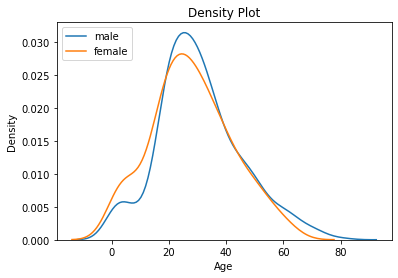

In [41]:
import seaborn as sns

sns.kdeplot(data=male.Age.values, label = 'male')
sns.kdeplot(data=female.Age.values, label = 'female')

plt.title('Density Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(loc='upper left')

Preencher density plots pode ajudar a distinguir quando plotamos mais de uma distribuição no mesmo gráfico. Embora nem sempre essa possa ser uma boa abordagem, ela consegue enfatizar a diferença entre as distribuições.

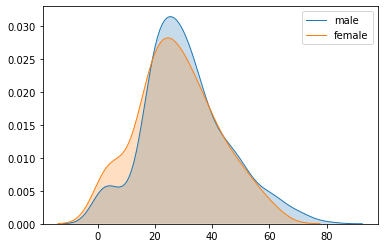

In [45]:
sns.distplot(male.Age.values, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1}, 
                  label = 'male')
sns.distplot(female.Age.values, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1}, 
                  label = 'female')

#### Distribuições acumuladas empíricas e q-q plots

Histogramas e densidades empíricas possuem alguns problemas. O histograma depende da discretização escolhida e a densidade depende da escolha do kernel e de um parâmetro chamado bandwidth.

O parâmetro bandwidth se comporta de forma similar ao bin do histograma. Se o bandwidth é muito pequeno, a densidade estimada pode conter muitos picos e as principais tendências dos dados serem escondidas. Por outro lado, se o bandwidth é muito grande, os pequenos detalhes da distribuição dos dados podem desaparecer. Além do mais, a escolha do kernel afeta o formato da curva de densidade. Em geral, quanto mais dados, menor será a importância da escolha do kernel. Portanto, density plots são confiáveis e informativos para grandes conjuntos de dados, mas podem enganar se o conjunto de dados for pequeno.

Vejamos alguns exemplos do nosso conjunto de idades dos passageiros do Titanic mudando apenas o parâmetro bandwidth.

Text(0.5, 0, 'Age')

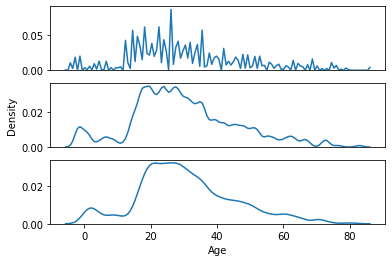

In [72]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
plt.ylabel('Density')
ax3 = fig.add_subplot(313)
ax1.set_xticks([])
ax2.set_xticks([])

sns.kdeplot(data=male.Age.values, bw=0, ax=ax1)
sns.kdeplot(data=male.Age.values, bw=1, ax=ax2)
sns.kdeplot(data=male.Age.values, bw=2, ax=ax3)
plt.xlabel('Age')

Claro, mostrar todos os dados como pontos pode parecer uma abordagem inteligente para evitar esses problemas, mas para um conjunto de dados muito grande não é interessante. Para resolver este problema podemos usar a distribuição empírica acumulada e os gráficos quantil-quantil (q-q plots). Essas visualizações não necessitam de escolha de parâmetros e motram todos os dados de uma vez só. Infelizmente elas são menos intuitivas que o histograma e o gráfico de densidade.

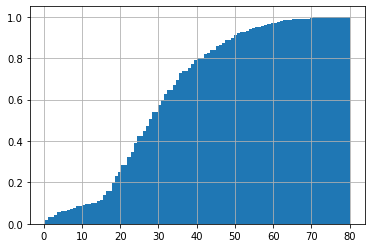

In [73]:
data.Age.hist(cumulative=True, density=1, bins=100)

Text(0, 0.5, 'ECDF')

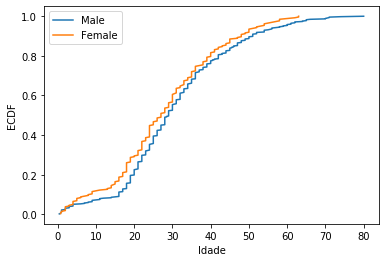

In [87]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y


x_male, y_male = ecdf(male.Age.dropna())
x_female, y_female = ecdf(female.Age.dropna())
plt.plot(x_male, y_male, marker=' ', linestyle = '-')
plt.plot(x_female, y_female, marker=' ', linestyle = '-')
plt.legend(('Male', 'Female'), loc='upper left')
plt.xlabel('Idade')
plt.ylabel('ECDF')

Os valores mais comuns aparecem na parte mais íngreme da CDF.

As distribuições analíticas são caracterizadas por funções matemáticas e podem ser usadas para modelar distribuições empíricas. Um modelo é uma simplificação, deixando de fora detalhes desnecessários. Por exemplo, uma distribuição observada pode ter erros de medição ou peculiaridades específicas da amostra. Modelos analíticos os suavizam. Modelos analíticos também são uma forma de compactação de dados. Quando um modelo se ajusta bem a um conjunto de dados, um pequeno conjunto de parâmetros pode resumir uma grande quantidade de dados. É importante lembrar que todos os modelos são imperfeitos.

A primeira distribuição que conheceremos é a distribuição normal. A distribuição nomral, também chamada de Guassiana, é comumente usada porque consegue descrever diversos fenômenos, pelo menos de forma aproximada. A distribuição normal é caracterizada por dois parâmetros: a média, µ e o desvio padrão σ. Quando os seus parâmetros µ = 0 e σ = 1, ela é chamada de distribuição normal padrão. Sua CDF é definida por uma integral que não possui uma solução de forma fechada, mas existem algoritmos que a avaliam eficientemente. A pdf da distribuição normal é dada por:

$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-(x-\mu)^2/2\sigma^2}$

A CDF da distribuição normal é definida por uma integral que não possui uma solução de forma fechada, mas existem algoritmos que a avaliam eficientemente.

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


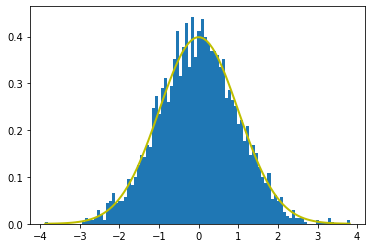

In [109]:
class norm1:
    def __init__(self, a1, b1, c1):
        self.a1 = a1
        self.b1 = b1
        self.c1 = c1
        
    def dist_curve(self):
        plt.plot(self.c1, 1/(self.b1 * np.sqrt(2 * np.pi)) *
            np.exp( - (self.c1 - self.a1)**2 / (2 * self.b1**2) ), linewidth=2, color='y')
        plt.show()

#mean 0 and sd 1 for the standard normal distribution
mean = 0
sd = 1

c = np.random.normal(mean, sd, 3000)
        
w1, x1, z1 = plt.hist(c, 100, normed=True) #hist

hist1 = norm1(mean, sd, x1)
plot1 = hist1.dist_curve()

Algumas propriedades da distribuição normal padrão:

- A curva normal é simétrica em torno da média e possui formato de sino.
- A média, moda e mediana é zero, que é o centro da curva
- Aproximadamente 68% dos dados estão entre -1 e +1 (i.e. dentro de 1 desvio padrão da média), 95% estão entre -2 e +2 (dentro de 2 desvios padrões da média) e 99,7% entre -3 e 3 (3 desvios padrões da média)

O gráficos quantil-quantil são uma ótima forma de visualização quando queremos determinar se os dados seguem ou não uma determinada distribuição. Assim como nas ecdfs, o q-q plot é baseado no ordenamento dos dados. Mais comumente, o gráfico q-q é feito utilizando a distribuição normal como referência.

Os quantis teóricos são mostrados no eixo x. Ou seja, não são os nossos dados, são simplesmente uma expectativa de onde os nossos dados deveriam ser, se eles forem normais. Nossos dados são plotados no eixo y.

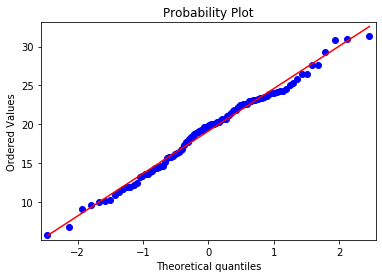

In [112]:
import scipy.stats as ss
import pylab 

measurements = np.random.normal(loc = 20, scale = 5, size=100)
ss.probplot(measurements, dist="norm", plot=pylab)
plt.margins(0.02)

Plotaremos as duas cdfs para comparar

Text(0, 0.5, 'CDF')

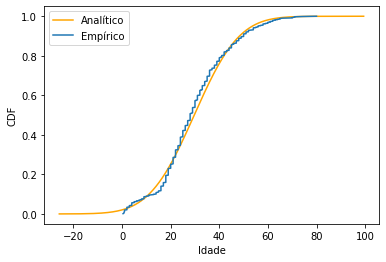

In [129]:
def normal_cdf(dados, label):
    try:
        mean = dados.mean()
        std_dev = dados.std()
    except:
        mean = np.mean(dados)
        std_dev = np.std(dados)
    lin = ss.norm.rvs(size=10000, loc=mean, scale=std_dev) 
    x = np.sort(lin)
    normal = ss.norm.cdf(x, mean, std_dev)
    plt.plot(x, normal, color='orange', label=label)

normal_cdf(data.Age.dropna(), label='Analítico')
x, y = ecdf(data.Age.dropna())
plt.plot(x, y, marker=' ', linestyle = '-', label='Empírico')
plt.legend(loc='upper left')
plt.xlabel('Idade')
plt.ylabel('CDF')

#### Teorema do limite central

Vamos fazer exatamente o mesmo procedimento para os dados de Tarifa do Titanic.

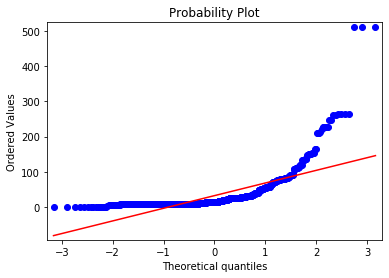

In [113]:
ss.probplot(data.Fare.dropna(), dist="norm", plot=pylab)
plt.margins(0.02)

Text(0, 0.5, 'CDF')

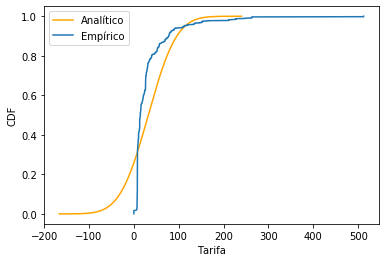

In [115]:
normal_cdf(data.Fare.dropna(), label='Analítico')
x, y = ecdf(data.Fare.dropna())
plt.plot(x, y, marker=' ', linestyle = '-', label='Empírico')
plt.legend(loc='upper left')
plt.xlabel('Tarifa')
plt.ylabel('CDF')

Veja que os dados aparentemente não seguem uma distribuição normal. Na verdade eles seguem uma distribução que não conhecemos e que ela é assimétrica. Ou seja, tendenciosa, neste caso, para a esquerda. Mais passageiros compraram passagens baratas.

Agora vamos obter algumas amostras da população. Em outras palavras, vamos obter 1000 sub-conjuntos de dados de tamanho 100 da população de passageiros do Titanic e plotar a distribuição de médias (x̄). Vamos ver o que acontece.

Text(0, 0.5, 'CDF')

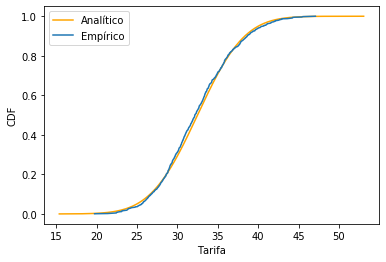

In [131]:
means = []
for n in range(1000):
    means.append(data.Fare.sample(n=100).mean())

normal_cdf(means, label='Analítico')
x, y = ecdf(means)
plt.plot(x, y, marker=' ', linestyle = '-', label='Empírico')
plt.legend(loc='upper left')
plt.xlabel('Tarifa')
plt.ylabel('CDF')

Obtivemos uma distribuição normal! Isso aconteceu por causa do teorema do limite central:

Independentemente do formato da distribuição da população, a distribuição amostral se aproxima da distribuição normal. Quanto maior o tamanho da amostra, a distribuição amostral será cada vez mais parecida com a normal.

Ele é base para estimar os parâmetros como a média populacional ou o desvio padrão da média populacional a partir de uma amostra aleatória dessa população, ou seja, da média amostral e do desvio padrão da média amostral até calcular a probabilidade de um parâmetro ocorrer dado um intervalo, sua média amostral e o desvio padrão da média amostral.

E mais uma coisa. Verifiquemos qual a média populacional (todos os passageiros do titanic) e a nossa média amostral.

In [138]:
pop_mean = data.Fare.mean()
samp_mean = np.mean(means)
pop_mean, samp_mean

(32.2042079685746, 32.484532252)

As duas médias se aproximaram. Isso foi graças a **Lei dos Grandes Números**.

Quanto mais amostras forem retiradas da população e quanto maior o tamanho das amostras, a média da distribuição se aproximará da média populacional.